In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)

In [3]:
auto = pd.read_csv('Automobile.csv')
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Plot for Single variable

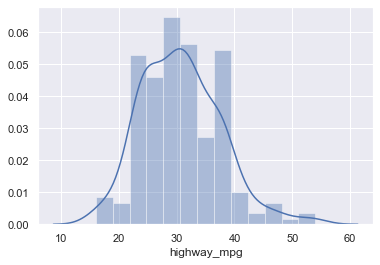

In [4]:
sns.distplot(auto['highway_mpg']); # Creates a histogram which takes some default bin size on the x axis and plots the frequency of the data that belongs to that bin
# the blue line that looks like bell shape is called KDE (kernal Density Estimate). The sum of all the bar heights (y-axis represents the height of the individual bar) = 1
# KDE makes the graph as distribution rather than a histogram

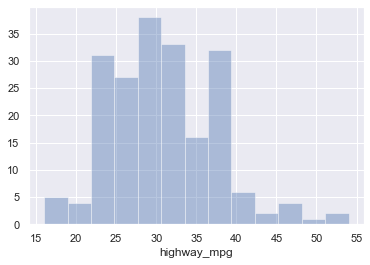

In [5]:
sns.distplot(auto['highway_mpg'], kde=False); # with KDE = flase, the graph becomes histogram. In the below graph, there are 5 cars that has highway_mpg b/w 17 to 20

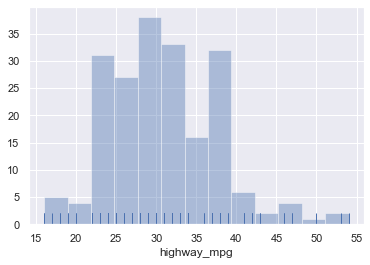

In [6]:
sns.distplot(auto['highway_mpg'],kde=False, rug=True); # Rug plot gives histogram with lines wherever we have the value

# Plot for bivariables

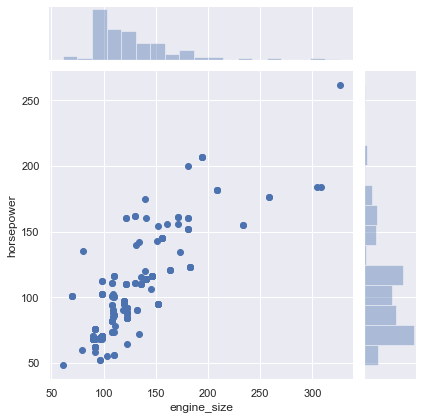

In [7]:
sns.jointplot(auto['engine_size'], auto['horsepower']); # seaborn jointplot gives a scatter plot b/w 2 variables

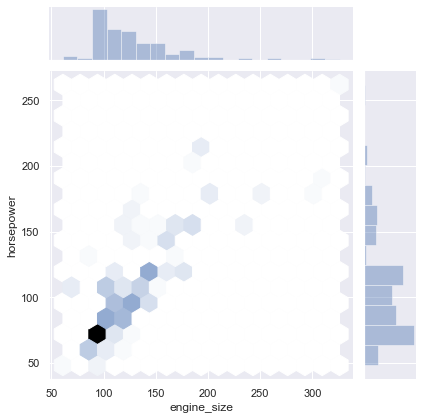

In [8]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind='hex'); # hex displays a hexagon whereever there is a data element
# the darker hexagon represents that there are more no. of elements in that engine_size, harsepower combination

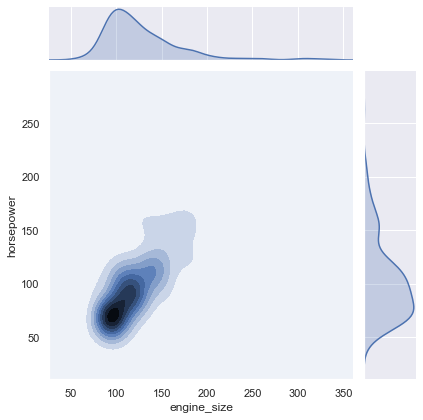

In [9]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind='kde'); # it plots the distribution, the shape define the 
# area the values exits, darker area represents more values in that region

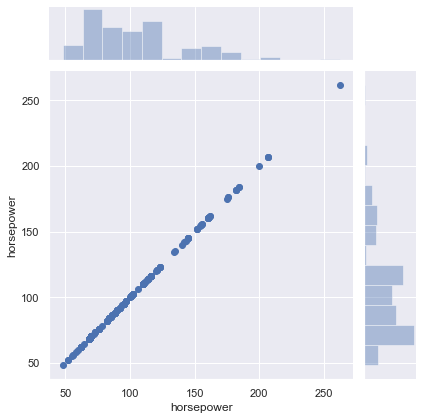

In [10]:
sns.jointplot(auto['horsepower'], auto['horsepower']);

# Pairwise Visualization

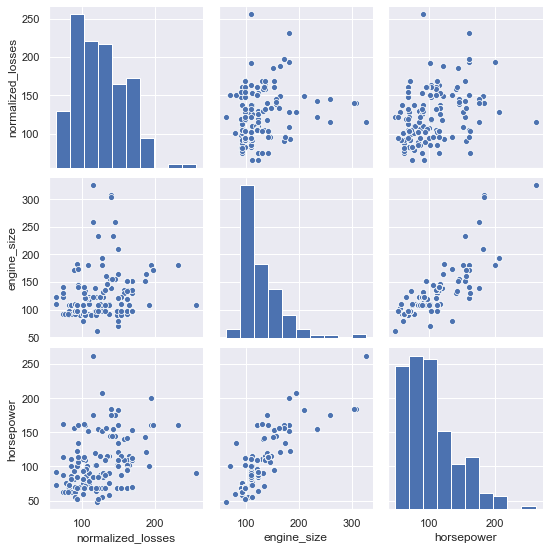

In [11]:
sns.pairplot(auto[['normalized_losses','engine_size','horsepower']]); # creates 3X3 grid of graphs with each dataset
# The places where we have the same dataset in both x and y, it creates a histogram

# Plotting Categorical Data

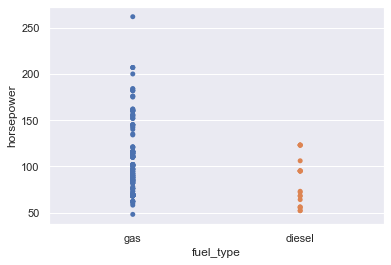

In [12]:
# sns.stripplot(auto['fuel_type'], auto['horsepower'], jitter=True); # Jitter=true makes the plots scatterred, where as with jitter=false, everything will be strightline
sns.stripplot(auto['fuel_type'], auto['horsepower'], jitter=False);

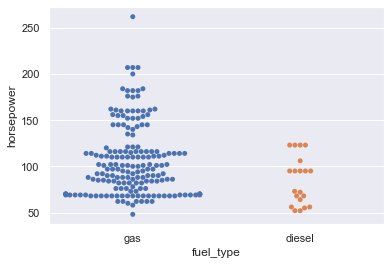

In [20]:
sns.swarmplot(auto['fuel_type'], auto['horsepower']);

# Box Plots - another way of plotting categorical data

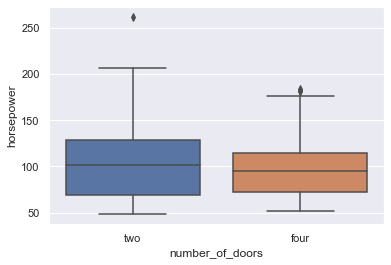

In [22]:
sns.boxplot(auto['number_of_doors'], auto['horsepower']);

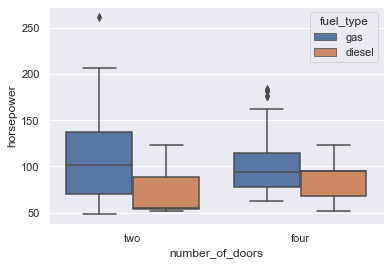

In [24]:
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type']); # blue and orange colors are fuel type hues

# Bar Charts

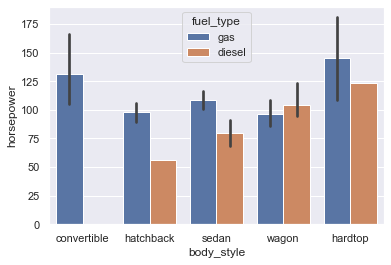

In [14]:
sns.barplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']); # the black line represents the 95% confidence level 
# For example the average horsepower of a gaseline convertable is arounfd 130 but it could vary from 110 to 170 (which is a 95% confidence interval)
# In the bar chart we have a low value of 0 to the bar, sometimes it makes sense to have 0 and sometimes its not
# If we dont want 0 we  can use point plot
# sns.pointplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']);

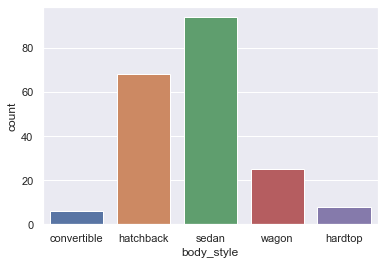

In [28]:
sns.countplot(auto['body_style']); # Bar charts plots the mean of each category, but count plot will plot against the count
# As per the below graph, we have around 65 hatchbacks, 25 wagons..etc

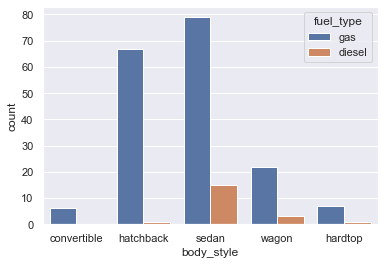

In [29]:
sns.countplot(auto['body_style'], hue=auto['fuel_type']); # We can add hue to count plot

# Point Plot

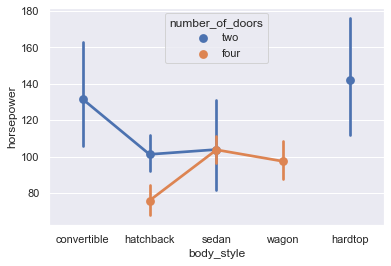

In [31]:
# Point Plot plots actual mean value
sns.pointplot(auto['body_style'],auto['horsepower'], hue=auto['number_of_doors'])
# The first blue dot in the first line represents that the average horsepower of cars that are 2 door convertible is 130
# there are not cars that are convertible with 4 doors
# similarly Hatchback with 2 doors with horsepower of about 110 and four door about 70

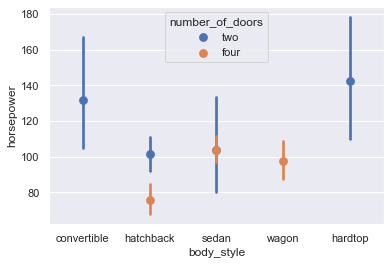

In [40]:
sns.pointplot(auto['body_style'],auto['horsepower'], hue=auto['number_of_doors'], linestyles='None');
# linestyle='None' will remove the connecting lines in the above graph

# Drawing multiple categorical graphs

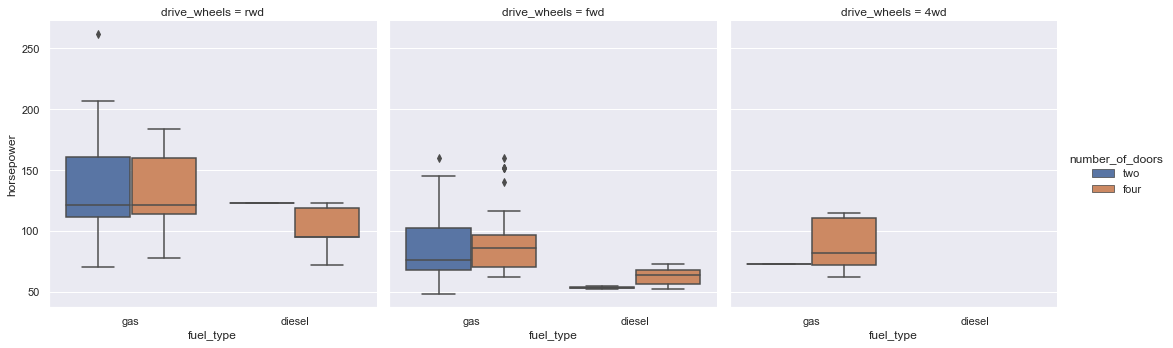

In [36]:
sns.catplot(x='fuel_type',
            y='horsepower',
           hue='number_of_doors',
           col='drive_wheels',
           data=auto,
           kind='box');

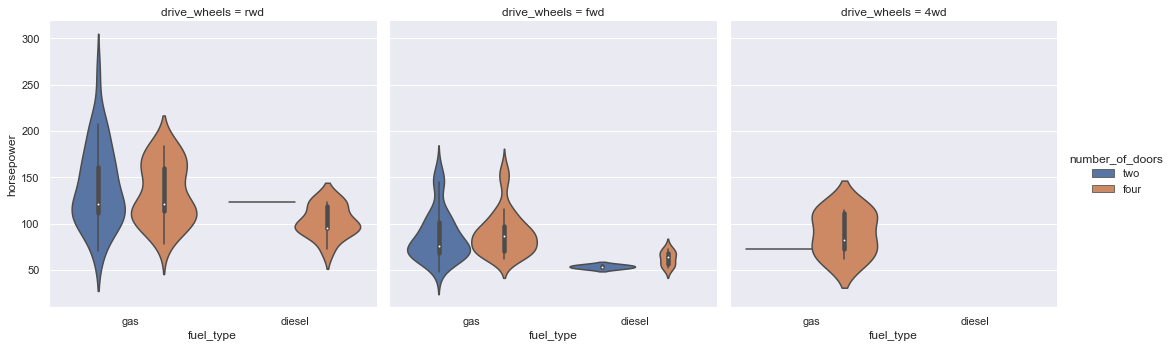

In [39]:
sns.catplot(x='fuel_type',
            y='horsepower',
           hue='number_of_doors',
           col='drive_wheels',
           data=auto,
           kind='violin'); # Kind = 'violin' represents the kde (kernal density estimate)

# different types of catplot kind = [point, bar,count,box,violin,strip]

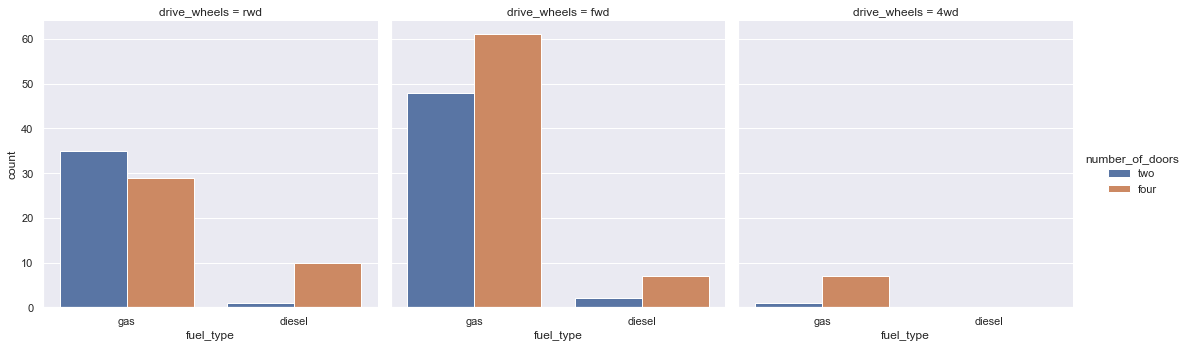

In [42]:
sns.catplot(x='fuel_type',
#             y='horsepower',
           hue='number_of_doors',
           col='drive_wheels',
           data=auto,
           kind='count'); # for kind =' count', we shouln't put y value as the y axis would be a count

# Drawing Linear Regression Models

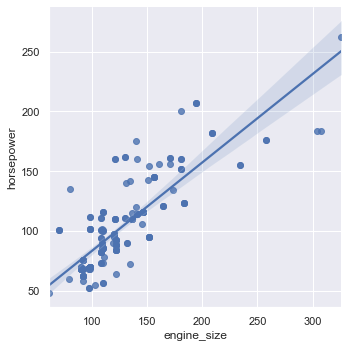

In [43]:
sns.lmplot(y='horsepower', x='engine_size', data=auto);
# The solid line is the best fit line ( The line that goes through majority data points), the blue shaded area represents
# the 95 % confidence interval based on the change of slope or interceptor

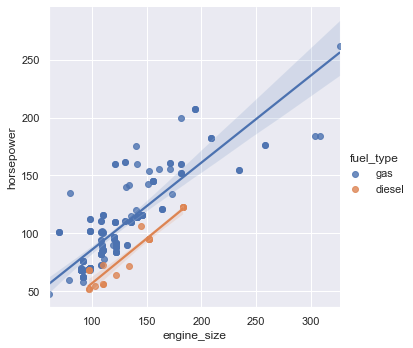

In [44]:
sns.lmplot(y='horsepower', x='engine_size', data=auto, hue='fuel_type');